In [29]:
import requests
import json
import numpy as np
import os
import cv2
from PIL import Image

In [30]:
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open('image.jpg', 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)

        # Load the image from the file
        image = cv2.imread('image.jpg')

        # Remove the temporary image file
        os.remove('image.jpg')

        return image
    else:
        print('Error loading image:', response.status_code)
        return None

In [31]:
image_url = 'https://ultralytics.com/images/bus.jpg'
image = load_image_from_url(image_url)

In [32]:
def numpy_to_image(image_array):
    # Check if the image is already a PIL Image object
    if isinstance(image_array, Image.Image):
        return image_array
    else:
        # Convert the image to 8-bit unsigned integers
        image_array = image_array.astype('uint8')

        # Convert BGR to RGB
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

        # Convert NumPy array to PIL Image
        image = Image.fromarray(image_array)

        # Check if the image is already in RGB format
        if image.mode == 'RGB':
            return image
        else:
            # Convert the image to RGB format
            image = image.convert('RGB')

        # Return the PIL Image object
        return image

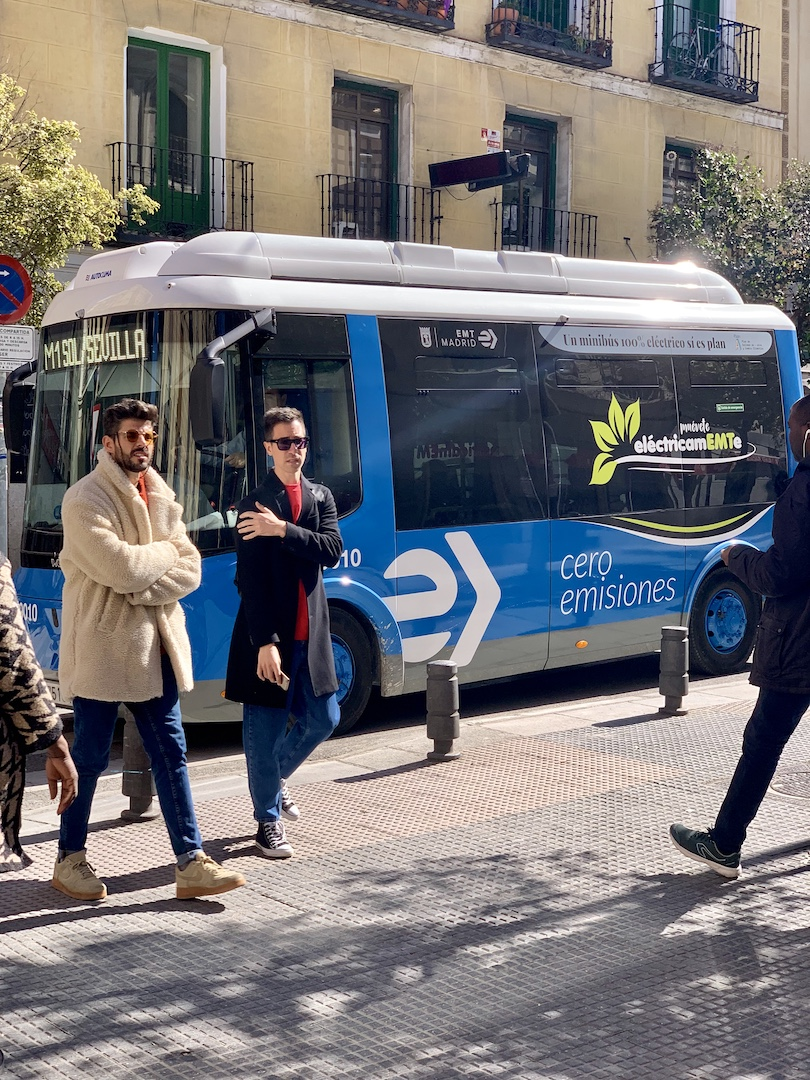

In [33]:
numpy_to_image(image)

In [34]:
# Prepare the request payload
data_list = image.tolist()
payload = {
    "inputs": [
        {
            "name": "INPUT_1",
            "datatype": "FP32",
            "shape": [1, 1080, 810, 3],
            "data": [data_list]
        }
    ]
}

# Convert the payload to JSON format
payload_json = json.dumps(payload)

# Send a POST request to the server
response = requests.post("http://202.92.159.241:8000/v2/models/Yolo/infer", data=payload_json)

# Print the response from the server
len(response.json())

3

In [35]:
pred_data = response.json()['outputs'][0]['data']
pred_data = np.array(pred_data).reshape(1080,810,3)

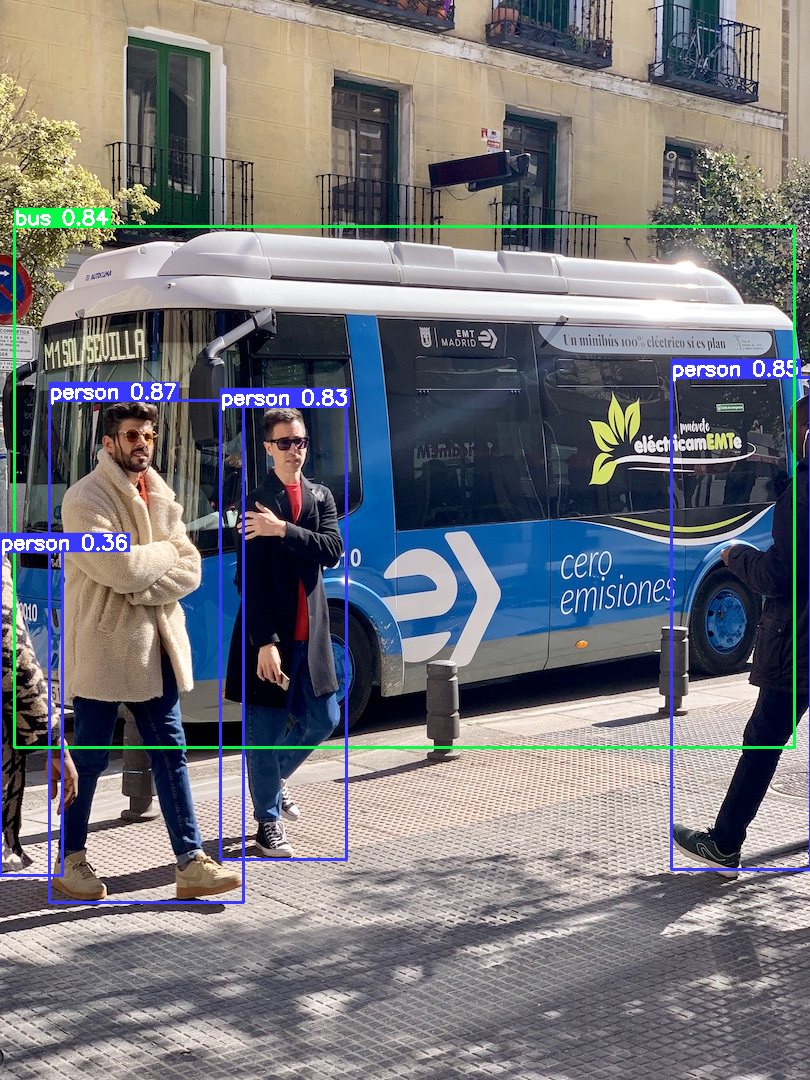

In [36]:
numpy_to_image(pred_data)